## Autocorrelation

- assume spot price is highly seasonal/autocorrelated, similar weekly patterns

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from load_dfs import load_openmeteo,load_spotprices

In [2]:
np.set_printoptions(suppress=True)

In [3]:
AarhusWeatherdf=load_openmeteo()
DK1spot=load_spotprices()

/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)


In [4]:
from statsmodels.tsa.stattools import acf

acf_values = acf(DK1spot['SpotPriceDKK'], nlags=40)

In [5]:
acf_values

array([1.        , 0.92929976, 0.80220257, 0.66968783, 0.55715975,
       0.47481581, 0.42318551, 0.39863823, 0.39446101, 0.40173949,
       0.41092699, 0.411164  , 0.40400848, 0.38074647, 0.34692922,
       0.3087089 , 0.27537856, 0.25770123, 0.26017356, 0.2869405 ,
       0.33952004, 0.41405538, 0.50195604, 0.57777199, 0.60495732,
       0.55686543, 0.46260722, 0.35991284, 0.2698976 , 0.2030302 ,
       0.16177766, 0.14550713, 0.14852164, 0.16458827, 0.18381357,
       0.19541615, 0.19478957, 0.17694633, 0.14560888, 0.10788695,
       0.07592145])

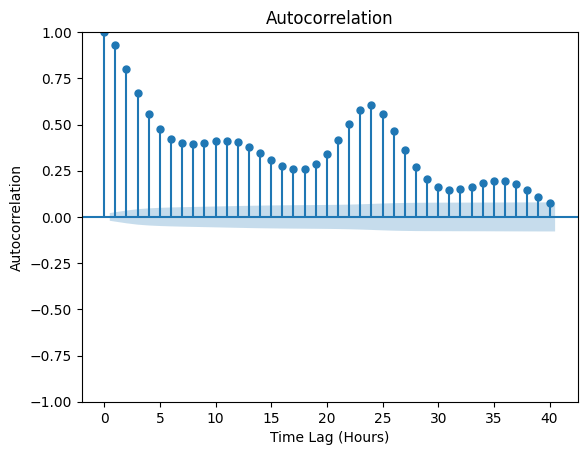

In [6]:
#shaded region is 95% confidence interval, so if the line is outside the shaded region, it is statistically significant

from statsmodels.graphics.tsaplots import plot_acf

fig=plot_acf(DK1spot['SpotPriceDKK'], lags=40)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

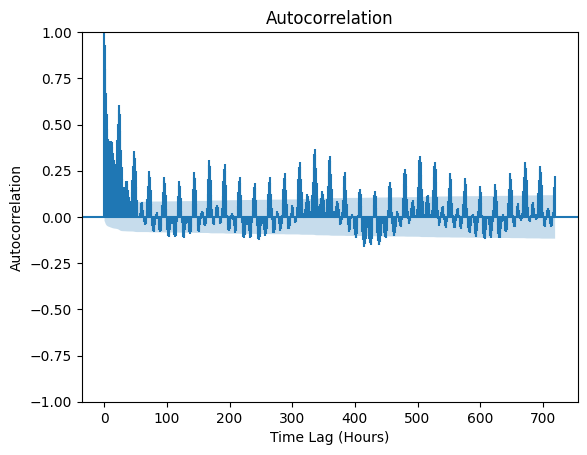

In [7]:
#up to 30 days

plot_acf(DK1spot['SpotPriceDKK'], lags=np.arange(24*30),markersize=0.01)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

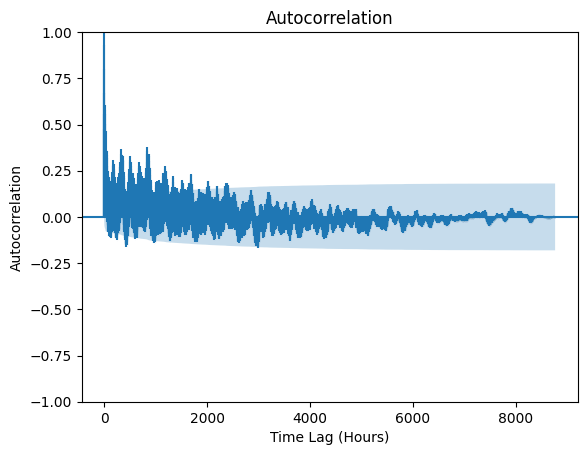

In [8]:
#all hours throughout the year

plot_acf(DK1spot['SpotPriceDKK'], lags=np.arange(24*365),markersize=0.01, alpha=0.05)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

In [9]:
# Get Lags where the autocorrelation is above 0.5, 0.25
acf_all = acf(DK1spot['SpotPriceDKK'], nlags=(24*365))
lags_above_05 = np.where(acf_all > 0.5)[0]
lags_above_025 = np.where(acf_all > 0.25)[0]

In [10]:
lags_above_025/24

array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
        0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
        0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
        0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
        0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ,
        1.04166667,  1.08333333,  1.125     ,  1.16666667,  1.91666667,
        1.95833333,  2.        ,  2.04166667,  6.95833333,  7.        ,
        7.04166667,  7.95833333,  8.        , 12.95833333, 13.        ,
       13.04166667, 13.91666667, 13.95833333, 14.        , 14.04166667,
       14.08333333, 14.95833333, 15.        , 15.04166667, 20.        ,
       20.95833333, 21.        , 21.04166667, 21.95833333, 22.        ,
       22.04166667, 27.95833333, 28.        , 28.04166667, 28.95833333,
       29.        , 34.        , 34.91666667, 34.95833333, 35.        ,
       35.04166667, 35.08333333, 35.91666667, 35.95833333, 36.  

In [11]:
lags_above_05

array([ 0,  1,  2,  3,  4, 22, 23, 24, 25])

Text(0, 0.5, 'Autocorrelation')

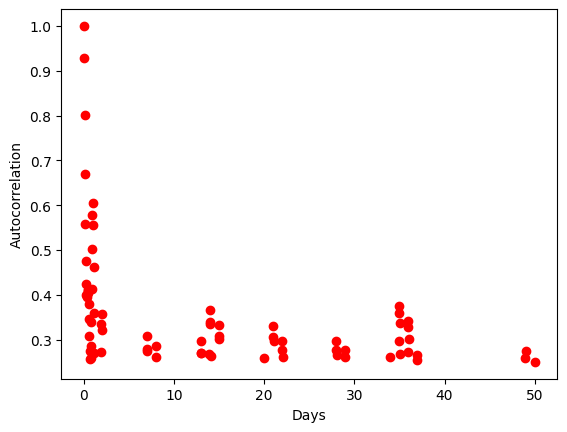

In [12]:
plt.scatter(lags_above_025/24, acf_all[lags_above_025], color='red')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

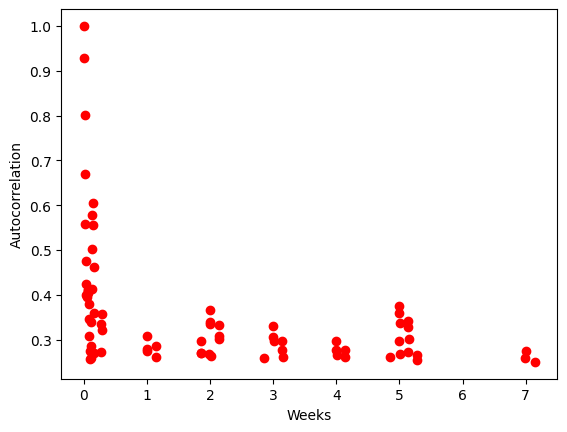

In [13]:
plt.scatter(lags_above_025/(24*7), acf_all[lags_above_025], color='red')
plt.xlabel('Weeks')
plt.ylabel('Autocorrelation')

In [14]:
# Get all acf values above the 95% confidence interval

acf_all, confint = acf(DK1spot['SpotPriceDKK'], nlags=(24*365), alpha=0.05)
#lags_above_conf = np.where(acf_all > confint)[0]

In [15]:
diff = np.abs(acf_all - confint[:,0])
lags_above_conf = np.where(acf_all > diff)[0]

Text(0, 0.5, 'Autocorrelation')

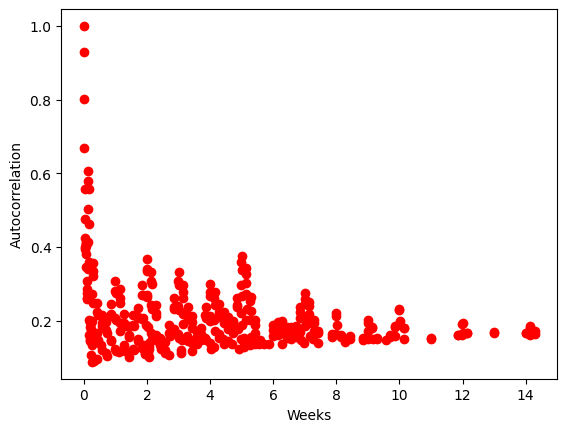

In [16]:
plt.scatter(lags_above_conf/(24*7), acf_all[lags_above_conf], color='red')
plt.xlabel('Weeks')
plt.ylabel('Autocorrelation')